<a href="https://colab.research.google.com/github/RoseSarlake/deep-learning/blob/main/DL_exe4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [77]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [ ]:
#!pip install scikit-image

In [178]:
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras import datasets, layers, models
from keras.preprocessing.image import ImageDataGenerator,array_to_img, img_to_array, load_img
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from skimage import data, color
from skimage.transform import rescale, resize, downscale_local_mean
import seaborn as sns
from PIL import Image

In [79]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Mon Dec 27 14:19:16 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.44       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   73C    P0    72W / 149W |   1304MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

#1.  CIFAR10

In [45]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

170508288/170498071 [==============================] - 3s 0us/step


In [46]:
model1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
  tf.keras.layers.MaxPooling2D((2, 2)),
  tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
  tf.keras.layers.MaxPooling2D((2, 2)),
  tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(10)
])
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

In [47]:
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optimizer = tf.keras.optimizers.Adam()

model1.compile(optimizer,loss_object,metrics=['accuracy'])
history = model1.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 22s 9ms/step - loss: 1.5568 - accuracy: 0.4306 - val_loss: 1.2942 - val_accuracy: 0.5403
Epoch 2/10
1563/1563 [==============================] - 13s 8ms/step - loss: 1.1914 - accuracy: 0.5752 - val_loss: 1.0992 - val_accuracy: 0.6111
Epoch 3/10
1563/1563 [==============================] - 13s 9ms/step - loss: 1.0366 - accuracy: 0.6348 - val_loss: 1.0254 - val_accuracy: 0.6298
Epoch 4/10
1563/1563 [==============================] - 13s 8ms/step - loss: 0.9454 - accuracy: 0.6685 - val_loss: 0.9868 - val_accuracy: 0.6502
Epoch 5/10
1563/1563 [==============================] - 13s 9ms/step - loss: 0.8763 - accuracy: 0.6917 - val_loss: 0.9126 - val_accuracy: 0.6854
Epoch 6/10
1563/1563 [==============================] - 13s 9ms/step - loss: 0.8198 - accuracy: 0.7130 - val_loss: 0.9219 - val_accuracy: 0.6787
Epoch 7/10
1563/1563 [==============================] - 13s 8ms/step - loss: 0.7721 - accuracy: 0.7312 - val_loss: 0.8903 - val_ac

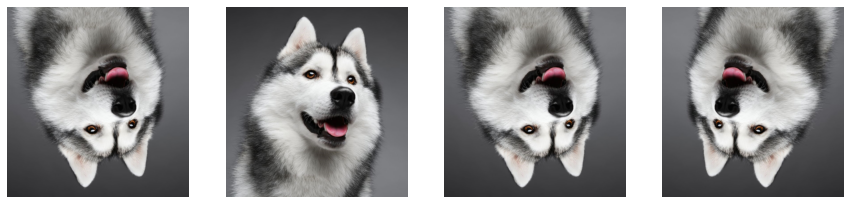

In [56]:
# show the provideid image
img = mpimg.imread('/content/drive/MyDrive/Deep Learning/images/dog.jpg')
imgplot = plt.imshow(img)
plt.show()


data = img_to_array(img)
samples = np.expand_dims(data, 0)
datagen = ImageDataGenerator(horizontal_flip=True, vertical_flip=True)

# iterator
aug_iter = datagen.flow(samples, batch_size=1)

# generate samples and plot
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(15,15))

# generate batch of images
for i in range(4):

  image = next(aug_iter)[0].astype('uint8')
  mpimg.imsave(f'/content/drive/MyDrive/Deep Learning/images/dog().jpg',image)
  ax[i].imshow(image)
  ax[i].axis('off')

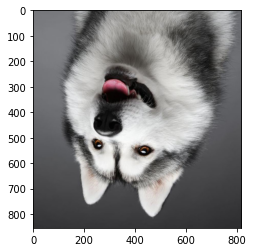

In [133]:
img = mpimg.imread('/content/drive/MyDrive/Deep Learning/images/dog3.jpg')
imgplot = plt.imshow(img)
plt.show()

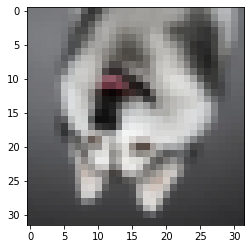

In [134]:
image_test = resize(img, (32, 32))
plt.imshow(image_test)

In [135]:
image_test = np.expand_dims(image_test, axis=0)
model1.predict(image_test)


array([[-0.23369494, -5.252767  ,  0.749664  ,  2.625694  , -1.0308633 ,
         3.3682292 , -2.2340677 ,  3.160522  , -2.0308206 , -2.334418  ]],
      dtype=float32)

In [136]:
labels = '''airplane automobile bird cat deer dog frog horse ship truck'''.split()
labels[model1.predict(image_test).argmax()]

'dog'

In [137]:
probability_model = tf.keras.Sequential([model1,tf.keras.layers.Softmax()])
probability_model(image_test[:5])

<tf.Tensor: shape=(1, 10), dtype=float32, numpy=
array([[1.1303911e-02, 7.4726267e-05, 3.0220116e-02, 1.9726297e-01,
        5.0935764e-03, 4.1449997e-01, 1.5292480e-03, 3.3675840e-01,
        1.8739025e-03, 1.3832360e-03]], dtype=float32)>

#2. MINST

In [204]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0


In [205]:
model2 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3, 3), activation='relu',input_shape=(28, 28, 1)),
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10,activation=tf.nn.softmax)
])
model2.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 flatten_3 (Flatten)         (None, 21632)             0         
                                                                 
 dense_6 (Dense)             (None, 128)               2769024   
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 10)                1290      
                                                                 
Total params: 2,770,634
Trainable params: 2,770,634
Non-trainable params: 0
_________________________________________________________________


In [206]:
model2.compile(optimizer,loss_object,metrics=['accuracy'])
history2 = model2.fit(x_train, y_train, epochs=10,validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 13s 7ms/step - loss: 1.5366 - accuracy: 0.9259 - val_loss: 1.4910 - val_accuracy: 0.9708
Epoch 2/10
1875/1875 [==============================] - 13s 7ms/step - loss: 1.4876 - accuracy: 0.9745 - val_loss: 1.4844 - val_accuracy: 0.9773
Epoch 3/10
1875/1875 [==============================] - 12s 6ms/step - loss: 1.4808 - accuracy: 0.9809 - val_loss: 1.4819 - val_accuracy: 0.9794
Epoch 4/10
1875/1875 [==============================] - 12s 6ms/step - loss: 1.4775 - accuracy: 0.9843 - val_loss: 1.4790 - val_accuracy: 0.9829
Epoch 5/10
1875/1875 [==============================] - 12s 6ms/step - loss: 1.4752 - accuracy: 0.9864 - val_loss: 1.4798 - val_accuracy: 0.9817
Epoch 6/10
1875/1875 [==============================] - 12s 7ms/step - loss: 1.4735 - accuracy: 0.9879 - val_loss: 1.4790 - val_accuracy: 0.9822
Epoch 7/10
1875/1875 [==============================] - 12s 6ms/step - loss: 1.4720 - accuracy: 0.9896 - val_loss: 1.4782 - val_ac

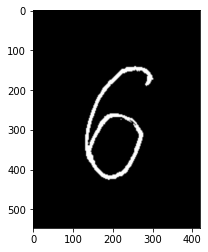

In [207]:
img = mpimg.imread('/content/drive/MyDrive/Deep Learning/images/handwritten6.jpg')
imgplot = plt.imshow(img)
plt.show()

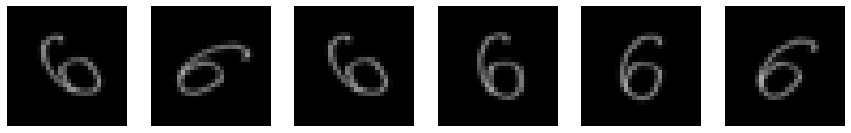

In [209]:
data = img_to_array(img)
samples = np.expand_dims(data, 0)
datagen = ImageDataGenerator(rotation_range=60, fill_mode='nearest')

# iterator
aug_iter = datagen.flow(samples, batch_size=1)

# generate samples and plot
fig, ax = plt.subplots(nrows=1, ncols=6, figsize=(15,15))

# generate batch of images
for i in range(6):

  image = next(aug_iter)[0].astype('uint8')
  image = resize(image, (28, 28))
  mpimg.imsave(f'/content/drive/MyDrive/Deep Learning/images/handwritten{i}.jpg',image)
  ax[i].imshow(image)
  ax[i].axis('off')

(28, 28)


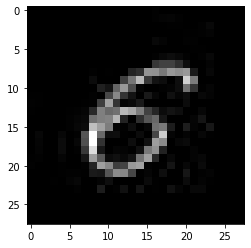

In [225]:
img = Image.open("/content/drive/MyDrive/Deep Learning/images/handwritten5.jpg")
image_test = img.convert('L')  #convert a gray scale
plt.imshow(image_test, cmap='gray')
print(image_test.size)

In [226]:
image_test = np.expand_dims(image_test, axis=0)
pred = model2.predict(image_test)
print(pred)
print(pred.argmax())

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
0
